# Lab 3: Images

In [1]:
# first we need to relabel the folders

#import os

#imagedir = '../../data/dogs/Images'
#for f in os.listdir(imagedir):
#    if f[0] == '.': # stupid .DS_Store on mac
#        continue
#    if '-' in f:
#        name = f.split('-',2)[1]
#        os.renames(os.path.join(imagedir,f), os.path.join(imagedir,name))
#
#for f in os.listdir(imagedir):
#    print(f)

In [2]:
# lets rename the images so its more readable
#for breed in os.listdir(imagedir):
#    if breed[0] == '.': continue
#    for img in os.listdir(os.path.join(imagedir,breed)):
#        tail = img.split('_',2)[1]
#        name = breed+'_'+tail
#        os.rename(os.path.join(imagedir,breed,img), os.path.join(imagedir,breed,name))

In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.misc import imresize
from skimage.color import rgb2gray
%matplotlib inline
imagedir = '../../data/dogs/Images'

## Data Preprocessing

There are 120 different breeds included in the dataset with bout 150 images of each breed for a total of 20,580 images.  The images are stored in directories by breed.  To make the size of the dataset more managable, we'll take a sample of 50 images from each 60 of the breed.

In [37]:
def load_images():
    num_samples_per_breed = 50 # number of samples of each breed
    num_breeds = 60
    h = 200
    w = 200
    
    # preinitialize the matrix
    img_arr = np.empty((num_samples_per_breed*num_breeds,h*w))  # 20 instances of each breed, each img will be 200x200 = 40000 pixels
    label_arr = []
    i = 0
    
    # sample 60 breeds from the dataset
    breed_sample_idx = np.random.randint(low=1, high=len(os.listdir(imagedir)), size=(num_breeds))
    for idx in breed_sample_idx:
        breed = os.listdir(imagedir)[idx]
        if breed[0] == '.' : continue # stupid ds.store on mac
        print(breed)
        
        # sample 50 images from the breed
        img_sample_idx = np.random.randint(low=1, high=len(os.listdir(os.path.join(imagedir,breed))), size=(num_samples_per_breed))
        for idx in img_sample_idx:
            dog_path = os.path.join(imagedir,breed,os.listdir(os.path.join(imagedir,breed))[idx])
            img = plt.imread(dog_path)
            
            # converts image to gray, resizes it to be 200x200, and then linearizes it
            img_gray_resize_flat = rgb2gray(imresize(img, (h,w,3))).flatten()
                        
            img_arr[i] = img_gray_resize_flat
            i = i + 1

            # add name to list of labels
            fname = dog_path.split('/')[-1] # 'dog_name_123497.jpg'
            dog_name = fname[:fname.rfind('_')] # 'dog_name'
            label_arr.append(dog_name)
            
    return img_arr, label_arr

In [38]:
%%time
dogs, labels = load_images()


whippet
African_hunting_dog
French_bulldog
Brabancon_griffon
Irish_setter
Border_terrier
Border_collie
Australian_terrier
otterhound
Scottish_deerhound
Newfoundland
Tibetan_terrier
Eskimo_dog
Appenzeller
Doberman
papillon
wire
African_hunting_dog
Irish_water_spaniel
standard_poodle
pug
Boston_bull
Japanese_spaniel
redbone
Staffordshire_bullterrier
Pembroke
Norfolk_terrier
American_Staffordshire_terrier
Saluki
Appenzeller
Brittany_spaniel
dingo
curly
wire
Welsh_springer_spaniel
Yorkshire_terrier
Airedale
Yorkshire_terrier
Airedale
Irish_terrier
Norfolk_terrier
Sussex_spaniel
beagle
standard_schnauzer
Eskimo_dog
German_short
Yorkshire_terrier
Samoyed
Tibetan_terrier
Greater_Swiss_Mountain_dog
Chihuahua
French_bulldog
redbone
Boston_bull
beagle
Weimaraner
Afghan_hound
Brittany_spaniel
Brabancon_griffon
Greater_Swiss_Mountain_dog
CPU times: user 34.9 s, sys: 2.67 s, total: 37.6 s
Wall time: 54 s


In [39]:
import pandas as pd

df = pd.DataFrame(dogs)
df

,0,1,2,3,4,5,6,7,8,9,...,39990,39991,39992,39993,39994,39995,39996,39997,39998,39999
0,0.351454,0.431284,0.501582,0.622592,0.701015,0.713345,0.712512,0.711113,0.722878,0.715035,...,0.235495,0.151750,0.157964,0.196346,0.207545,0.109506,0.148439,0.205864,0.164676,0.157949
1,0.505165,0.504034,0.563378,0.577628,0.580128,0.603917,0.610384,0.558868,0.496138,0.484098,...,0.450202,0.528053,0.551605,0.487774,0.473509,0.439316,0.452992,0.377893,0.376463,0.495830
2,0.078431,0.007843,0.007843,0.008409,0.000848,0.001131,0.001414,0.001414,0.008409,0.008691,...,0.392105,0.403869,0.388183,0.384262,0.396026,0.392105,0.407791,0.388183,0.384262,0.399948
3,0.960784,0.964706,0.956863,0.956863,0.960784,0.964706,0.960784,0.972549,0.964706,0.972549,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,0.843258,0.814973,0.796482,0.867353,0.852232,0.853631,0.877436,0.848020,0.749140,0.745493,...,0.065516,0.051036,0.056640,0.152088,0.178041,0.175167,0.169542,0.169832,0.163128,0.161461
5,0.184238,0.184238,0.188160,0.192082,0.203846,0.192082,0.193220,0.191554,0.175867,0.179789,...,0.595255,0.609014,0.554067,0.532495,0.476477,0.476745,0.550689,0.544796,0.490237,0.505127
6,0.829095,0.829095,0.829095,0.821252,0.821252,0.821252,0.821817,0.820984,0.817062,0.813141,...,0.450139,0.454061,0.434453,0.438375,0.450139,0.465825,0.442296,0.461904,0.465543,0.453495
7,0.232065,0.206364,0.191043,0.195025,0.195591,0.192189,0.206446,0.230541,0.214327,0.220793,...,0.256576,0.264420,0.280106,0.271429,0.255743,0.267508,0.240057,0.220449,0.216527,0.216527
8,0.121039,0.119373,0.271198,0.498083,0.367258,0.141176,0.089027,0.081169,0.095791,0.131383,...,0.281338,0.324475,0.331767,0.290885,0.346926,0.411093,0.447511,0.424815,0.369890,0.250271
9,0.373552,0.468243,0.355374,0.653421,0.722045,0.448085,0.271577,0.412433,0.263108,0.108202,...,0.183917,0.191760,0.246670,0.235188,0.220633,0.187020,0.187586,0.179743,0.187586,0.206911


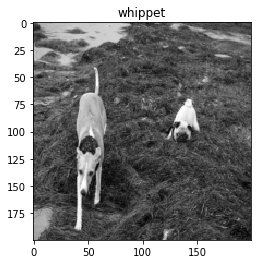

In [40]:
ex = dogs[0].reshape((200,200))
plt.imshow(ex, cmap='gray')
plt.title(labels[0])
plt.show()

In [41]:
# taken from Class Demo #4
def plot_gallery(images, titles, h, w, n_row=3, n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=1.5, top=.90, hspace=.35)
    
    # with slight modification
    sample = np.random.randint(low=0, high=images.shape[0], size=n_row*n_col)
    
    for i, idx in enumerate(sample):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[idx].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[idx], size=12)
        plt.xticks(())
        plt.yticks(())

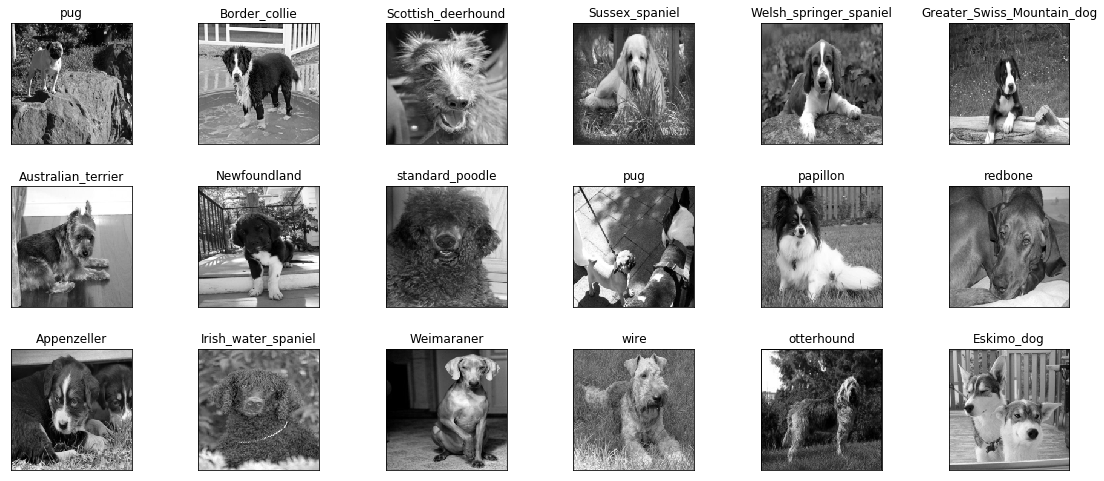

In [42]:
plot_gallery(dogs, labels, 200, 200) # defaults to showing a 3 by 6 subset of the faces

## Feature Extraction